In [1]:
%matplotlib inline 

##heading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper")
from itertools import combinations, groupby
from collections import Counter
import sys

In [3]:
def size(obj):
    """Return size of object in MB"""
    return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

##import the data

In [4]:
orders = pd.read_csv("instacart_2017_05_01/orders.csv")
print('orders -- dimensions: {0};   size: {1}'.format(orders.shape, size(orders)))
orders.head()

orders -- dimensions: (3421083, 7);   size: 376.24 MB


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
orders_products_prior = pd.read_csv('instacart_2017_05_01/order_products__prior.csv')
print('order_products_prior -- dimensions: {0};   size: {1}'
    .format(orders_products_prior.shape, size(orders_products_prior)))
display(orders_products_prior.head())

order_products_prior -- dimensions: (32434489, 4);   size: 1037.90 MB


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
orders_products_train = pd.read_csv('instacart_2017_05_01/order_products__train.csv')
print('orders_products_train -- dimensions: {0};   size: {1}'
    .format(orders_products_train.shape, size(orders_products_train)))
display(orders_products_train.head())

orders_products_train -- dimensions: (1384617, 4);   size: 44.31 MB


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
print(orders_products_prior["order_id"].nunique())

3214874


In [8]:
products = pd.read_csv('instacart_2017_05_01/products.csv')
print('products -- dimensions: {0};   size: {1}'
    .format(products.shape, size(products)))
display(products.head())

products -- dimensions: (49688, 4);   size: 5.57 MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
departments = pd.read_csv('instacart_2017_05_01/departments.csv')
print('departments -- dimensions: {0};   size: {1}'
    .format(departments.shape, size(departments)))
display(departments.head())

departments -- dimensions: (21, 2);   size: 0.00 MB


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
aisles = pd.read_csv('instacart_2017_05_01/aisles.csv')
print('aisles -- dimensions: {0};   size: {1}'
    .format(aisles.shape, size(aisles)))
display(aisles.head())

aisles -- dimensions: (134, 2);   size: 0.01 MB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


##EDA

TASK - NUMBER OF ORDERS IN ORDER HISTORY PER CUSTOMER

In [11]:
# determine number of unique entries in a column
userCount = orders["user_id"].nunique()

# get count of number of order per customer and store resulting Series 
# Note: here I leave orderCountPerUser as a Series and don't convert to a DataFrame
#       To convertto DataFrame I would have chained .reset_index(name="counts") 
orderCountPerUser = orders.groupby("user_id").size()
print(type(orderCountPerUser))
orderCountPerUser.head()

<class 'pandas.core.series.Series'>


user_id
1    11
2    15
3    13
4     6
5     5
dtype: int64

In [12]:
print ("""Database contains records of {:,} orders for {:,} users, ranging from {:,} to {:,} orders \
with a mean of {:.1f} orders per customer."""
       .format(len(orders), userCount,min(orderCountPerUser),max(orderCountPerUser), orderCountPerUser.mean()))

Database contains records of 3,421,083 orders for 206,209 users, ranging from 4 to 100 orders with a mean of 16.6 orders per customer.


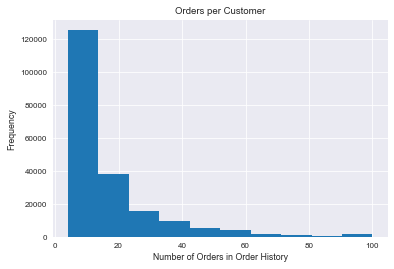

In [13]:
orderCountPerUser.hist()
plt.title("Orders per Customer")
plt.ylabel("Frequency")
plt.xlabel("Number of Orders in Order History")
plt.show()

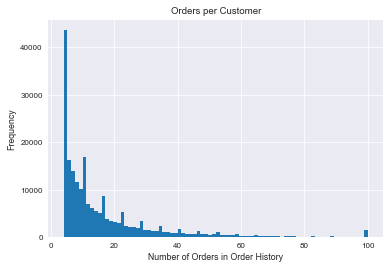

In [14]:
orderCountPerUser.hist(bins=80)
plt.title("Orders per Customer")
plt.ylabel("Frequency")
plt.xlabel("Number of Orders in Order History")
plt.show()

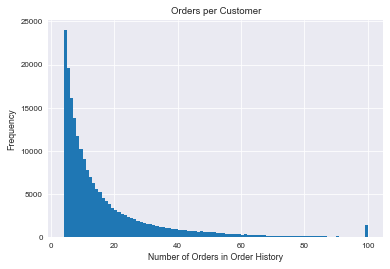

In [15]:
orderCountPerUser.hist(bins=range(4,101))
plt.title("Orders per Customer")
plt.ylabel("Frequency")
plt.xlabel("Number of Orders in Order History")
plt.show()

In [16]:
# convert to a dataframe (compare output of headw ith above)
df = orderCountPerUser.reset_index(name="counts")
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,user_id,counts
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5


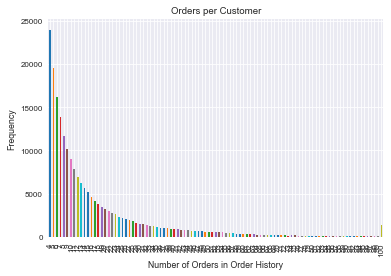

In [17]:
df.groupby("counts").size().plot.bar()
plt.title("Orders per Customer")
plt.ylabel("Frequency")
plt.xlabel("Number of Orders in Order History")
plt.show()

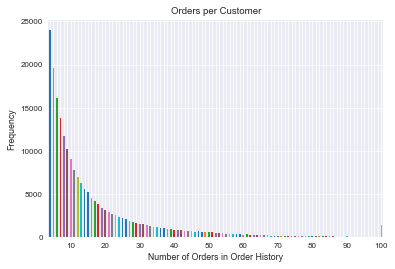

In [18]:
# create a list of labels 
labels = [ (k if k%10==0 else "") for k in range(4,101)]

fig, ax = plt.subplots()
df.groupby("counts").size().plot.bar();
ax.set_xticklabels(labels, rotation='horizontal')
plt.title("Orders per Customer")
plt.ylabel("Frequency")
plt.xlabel("Number of Orders in Order History")
plt.show()


TASK - NUMBER OF PRODUCTS PER ORDER

In [19]:
df = orders_products_prior.groupby('order_id').size().reset_index(name="counts")
df.head()

,order_id,counts
0,2,9
1,3,8
2,4,13
3,5,26
4,6,3


In [20]:
x = df['counts']
print ("The number of products per order range from {} to {} "
    .format(x.min(),x.max() ))

The number of products per order range from 1 to 145 


In [21]:
productsCutoff = 100
print ("There {:,} orders with more than {} products".format( 
    df[df['counts']>productsCutoff]['counts'].sum(), productsCutoff))

There 2,242 orders with more than 100 products


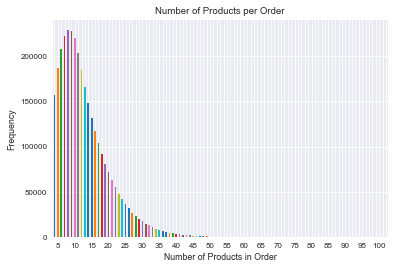

In [22]:
productsCutoff = 100
labels = [ (k if k%5==0 else "") for k in range(4,101)]

fig, ax = plt.subplots()
df[df['counts']<=productsCutoff].groupby("counts").size().plot.bar();
ax.set_xticklabels(labels, rotation='horizontal')
plt.title("Number of Products per Order")
plt.ylabel("Frequency")
plt.xlabel("Number of Products in Order")
plt.show()

In [23]:
x = df['counts']
print ("The number of products per order has mode {}, median {} and arithmetic mean {:.1f} products per order.\
Given how right skewed the distribution is the mode or median are more appropriate measures."
    .format(x.mode()[0],x.median(),x.mean()))

The number of products per order has mode 5, median 8.0 and arithmetic mean 10.1 products per order.Given how right skewed the distribution is the mode or median are more appropriate measures.


TASK - DISTRIBUTION OF ORDERS BY DAY OF WEEK

In [24]:
df = orders.groupby("order_dow").size().reset_index(name="counts")

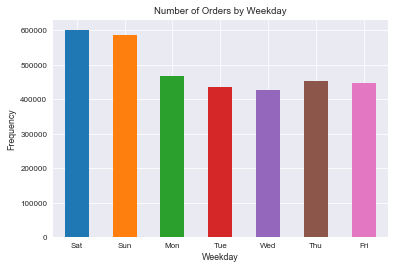

In [25]:
labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

fig, ax = plt.subplots()
df['counts'].plot.bar()
ax.set_xticklabels(labels, rotation='horizontal')
plt.title("Number of Orders by Weekday")
plt.ylabel("Frequency")
plt.xlabel("Weekday")
plt.show()

TASK - DISTRIBUTION OF ORDERS BY HOUR OF DAY

In [26]:
df = orders.groupby("order_hour_of_day").size().reset_index(name="counts")

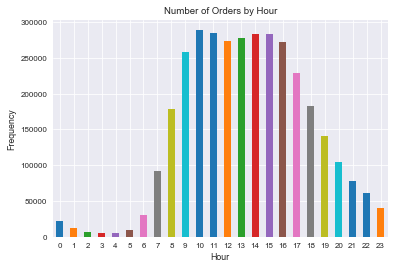

In [27]:
fig, ax = plt.subplots()
df['counts'].plot.bar()
ax.set_xticklabels(range(0,24), rotation='horizontal')
plt.title("Number of Orders by Hour")
plt.ylabel("Frequency")
plt.xlabel("Hour")
plt.show()

TASK - DISTRIBUTION OF TIME BETWEEN ORDERS

In [28]:
print ("About half ({:.2f}%) of the orders occur with a week of a previous order."
    .format(orders[orders["days_since_prior_order"]<8].size / orders.size*100))

About half (47.35%) of the orders occur with a week of a previous order.


In [29]:
df = orders.groupby("days_since_prior_order").size().reset_index(name="counts")
df.head()

,days_since_prior_order,counts
0,0.0,67755
1,1.0,145247
2,2.0,193206
3,3.0,217005
4,4.0,221696


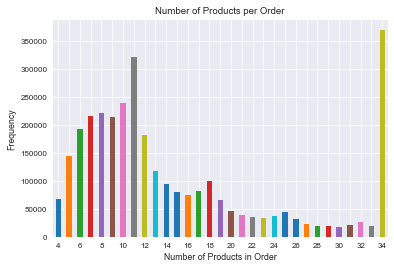

In [30]:
labels = [ (k if k%2==0 else "") for k in range(4,df['counts'].max()+1)]

fig, ax = plt.subplots()
df['counts'].plot.bar();
ax.set_xticklabels(labels, rotation='horizontal')
plt.title("Number of Products per Order")
plt.ylabel("Frequency")
plt.xlabel("Number of Products in Order")
plt.show()

TASK - DISTRIBUTION OF PRODUCTS BY DEPARTMENT

In [31]:
df = products.groupby("department_id").size().reset_index(name="counts")
df = (df
    .set_index('department_id').join(departments.set_index('department_id'))
    .sort_values(by=['counts']))

df.head()

,counts,department
department_id,,
10,38,bulk
2,548,other
12,907,meat seafood
8,972,pets
5,1054,alcohol


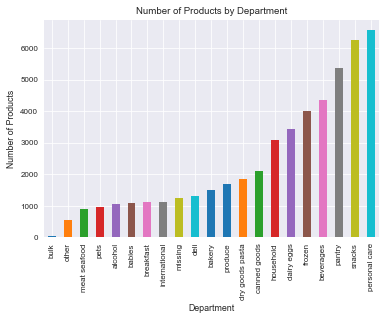

In [32]:
fig, ax = plt.subplots()
df['counts'].plot.bar();
ax.set_xticklabels(df['department'])
plt.title("Number of Products by Department")
plt.ylabel("Number of Products")
plt.xlabel("Department")
plt.show()

TASK - NUMBER OF PRODUCTS BY AISLE

In [33]:
df = products.groupby("aisle_id").size().reset_index(name="counts")
df = (df
    .set_index('aisle_id').join(aisles.set_index('aisle_id'))
    .sort_values(by=['counts']))

df.head()

,counts,aisle
aisle_id,,
18,12,bulk dried fruits vegetables
68,26,bulk grains rice dried goods
32,32,packaged produce
82,44,baby accessories
113,47,frozen juice


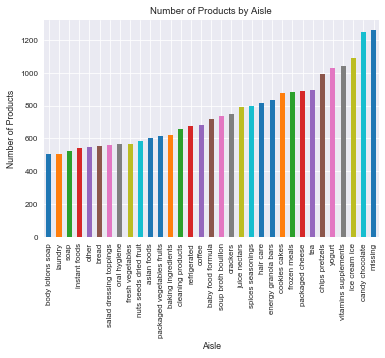

In [34]:
fig, ax = plt.subplots()
df[df['counts']>500]['counts'].plot.bar();
ax.set_xticklabels(df[df['counts']>500]['aisle'])
plt.title("Number of Products by Aisle")
plt.ylabel("Number of Products")
plt.xlabel("Aisle")
plt.show()

# Assignment

List of mandatory tasks:

Task  1: Top Selling Department
	Chart of number of products sold by department
Task  2: How Often are Products Reorder?
	Chart showing reordered/not-reordered products.
Task  3: Most Often Reordered Products 
	Which products are reordered most often and which probability?
Task  4: How are Aisles Organized Within Departments?
	Multi-chart showing distribution of products on aisles for various departments.
Task  5: How many Distinct Product do Customers Buy? 
	Chart of distribution of number of unique products in a customers history.

### TASK - TOP SELLING DEPARTMENT

In [70]:
df = products
orders_products_prior = pd.read_csv('instacart_2017_05_01/my_order_products__prior.csv')

#tells us how many times each department is listed in the orders/products
df = (pd.merge(products,orders_products_prior,on='product_id')
      .groupby("department_id").size().reset_index(name="orders"))

#sort the order counts from most orders to fewest orders, join with department to add department name
df_orders_dept = (df
    .set_index('department_id').join(departments.set_index('department_id'))
    .sort_values(by=['orders'], ascending=False))
df_orders_dept.head()

,orders,department
department_id,,
4,597,produce
16,428,dairy eggs
19,284,snacks
7,212,beverages
13,138,pantry


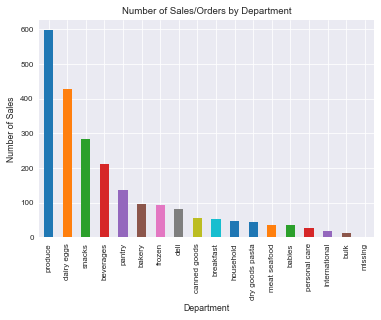

In [72]:
fig, ax = plt.subplots()
df_orders_dept['orders'].plot.bar();
ax.set_xticklabels(df_orders_dept['department'])
plt.title("Number of Sales/Orders by Department")
plt.ylabel("Number of Sales")
plt.xlabel("Department")
plt.show()

sales v size

In [82]:
df_products_dept = products.groupby("department_id").size().reset_index(name="products")
df_products_dept = (df_products_dept
    .set_index('department_id').join(departments.set_index('department_id'))
    .sort_values(by=['products']))
df_products_dept.head()

df_ps = pd.merge(df_products_dept,df_orders_dept).sort_values(by=['orders'],ascending=False)
df_ps.head()


,products,department,orders
8,1684,produce,597
12,3449,dairy eggs,428
16,6264,snacks,284
14,4365,beverages,212
15,5371,pantry,138


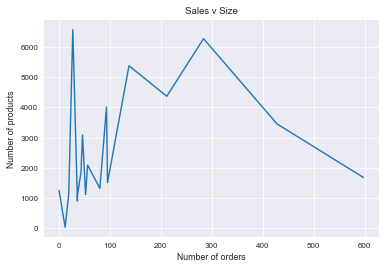

In [87]:
plt.title("Sales v Size")
plt.ylabel("Number of products")
plt.xlabel("Number of orders")
plt.plot(df_ps["orders"], df_ps["products"])

Task - How Often are Products Reorder

In [39]:
#orders_products_prior = pd.read_csv('instacart_2017_05_01/my_order_products__prior.csv')

df = (pd.merge(products,orders_products_prior,on='product_id')
      .groupby("reordered").size().reset_index(name="counts"))

print ("Over half ({:.2f}%) of the products have been reorderd."
    .format(df["counts"][1] / df["counts"].sum()*100))



Over half (55.58%) of the products have been reorderd.


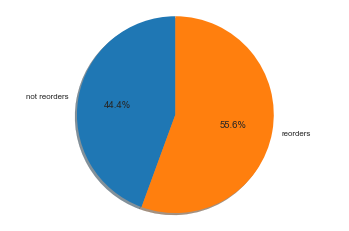

In [40]:
fig1, ax1 = plt.subplots()
labels = "not reorders","reorders"
ax1.pie(df["counts"], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Task - Most Often Reordered Products Which products are reordered most often and which probability

In [41]:
#reorders
df1 = (orders_products_prior.query("reordered==1")
      .groupby("product_id").size().reset_index(name="reorder_count")
      .sort_values(by=['reorder_count'], ascending=False))
df1.head()

,product_id,reorder_count
164,24852,54
85,13176,24
285,42972,23
57,8277,21
328,49235,20


In [42]:
df2 = (orders_products_prior.query("reordered==0")
      .groupby("product_id").size().reset_index(name="initial_order_count")
      .sort_values(by=['initial_order_count'], ascending=False))
df2.head()

,product_id,initial_order_count
359,21903,8
206,13176,6
268,16797,6
672,39275,5
412,24852,5


In [43]:
df3 = df1.merge(df2, how='outer', on="product_id")
print('df3 -- dimensions: {0};   size: {1}'.format(df3.shape, size(df3)))
df3['prob_of_reorder'] = df3.reorder_count.fillna(0) / (df3.reorder_count.fillna(0) + df3.initial_order_count.fillna(0))

df3 = (df3
    .set_index('product_id').join(products.set_index('product_id'))
    .sort_values(by=['prob_of_reorder'], ascending=False))

df3.head(n=10)

df3 -- dimensions: (851, 3);   size: 0.03 MB


,reorder_count,initial_order_count,prob_of_reorder,product_name,aisle_id,department_id
product_id,,,,,,
42972,23.0,1,0.958333,Natural Pure Sparkling Water,115,7
8277,21.0,1,0.954545,Apple Honeycrisp Organic,24,4
17183,18.0,1,0.947368,Peach Yoghurt,120,16
35851,15.0,1,0.937500,Organic Greek Lowfat Yogurt With Cherries,120,16
22151,14.0,1,0.933333,Tart Cherry Yoghurt,120,16
29328,14.0,1,0.933333,Organic Sweet Mini Peppers,123,4
43122,13.0,1,0.928571,Organic Bartlett Pear,24,4
33894,13.0,1,0.928571,Goldfish Cheddar Baked Snack Crackers Multi Packs,78,19
7398,12.0,1,0.923077,Indian Samosa Wrap,38,1


# Task - How are Aisles Organized Within Departments? Multi-chart showing distribution of products on aisles for various departments. 

In [44]:
df = (products
    .set_index('aisle_id').join(aisles.set_index('aisle_id'))
    ).set_index('department_id').join(departments.set_index('department_id'))
df.head(n=10)


,product_id,product_name,aisle,department
department_id,,,,
1,118,Ground Turkey Chub,frozen meat seafood,frozen
1,383,Breaded Chicken Breast Tenders,frozen meat seafood,frozen
1,402,100% Pure Beef Homestyle Patties,frozen meat seafood,frozen
1,625,"Chicken Breast Nuggets, Dinosaur Shaped",frozen meat seafood,frozen
1,831,All Natural Premium Cornish Hen,frozen meat seafood,frozen
1,1070,Spicy Chicken Breast Patties,frozen meat seafood,frozen
1,1109,Gluten Free Crispy Battered Haddock,frozen meat seafood,frozen
1,1178,Key West Pink Shrimp,frozen meat seafood,frozen
1,1343,Potato Crunch Fish Fillets,frozen meat seafood,frozen


In [45]:
df2 = df.groupby(["department","aisle"]).size().reset_index(name='count')
#print(df2)
df2.head()

,department,aisle,count
0,alcohol,beers coolers,385
1,alcohol,red wines,232
2,alcohol,specialty wines champagnes,95
3,alcohol,spirits,195
4,alcohol,white wines,147


In [46]:
print(df2["count"].sum())

49688


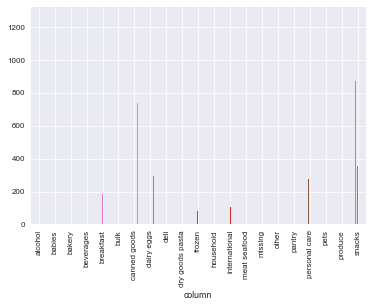

In [47]:
n_groups = len(df2["department"].unique())


majorList = []

for dept in df2["department"].unique() :
  
    for ais in df2["aisle"][df2['department'] == dept].unique() : 

     v = df2["count"][(df2["department"] == dept) & (df2["aisle"] == ais)].iloc[0]
     minorList = [ais,dept,v]
     majorList.append(minorList)


#print(majorList)

x = pd.DataFrame(majorList,columns=['group','column','val'])
x.pivot("column","group","val").plot(kind="bar",legend=False)
#plt.rcParams['figure.figsize'] = [30, 25]
plt.show()
#x = pd.DataFrame([['g1','c1',10],['g1','c2',12],['g1','c3',13],['g2','c1',8],
#                   ['g2','c2',10],['g2','c3',12],['g2','c4',12]],columns=['group','column','val'])

#x.pivot("column", "group", "val").plot(kind='bar')

#plt.show()    

    
   

    


Task - How many Distinct Product do Customers Buy? Chart of distribution of number of unique products in a customers history

In [48]:
mopp = pd.read_csv('instacart_2017_05_01/my_order_products__prior.csv')
mo = pd.read_csv('instacart_2017_05_01/my_orders.csv')

df = (mo
    .set_index('order_id').join(mopp.set_index('order_id'))
    .groupby("order_id").size().reset_index(name="distinct_items")
    .sort_values(by=['distinct_items'], ascending=False)
    )
print(len(df))
df.head()

df2 = df.groupby("distinct_items").size().reset_index(name="num").sort_values(by=['num'], ascending=False)
df2.head()

322


,distinct_items,num
0,1,44
6,7,29
2,3,28
3,4,26
4,5,26


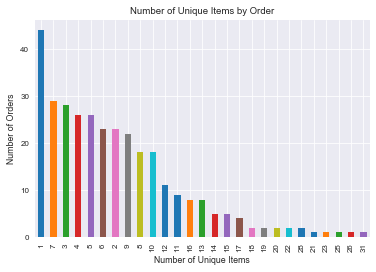

In [49]:
fig, ax = plt.subplots()
df2['num'].plot.bar();
ax.set_xticklabels(df2['distinct_items'])
plt.title("Number of Unique Items by Order")
plt.ylabel("Number of Orders")
plt.xlabel("Number of Unique Items")
plt.show()

In [50]:
df = (mo
    .set_index('order_id').join(mopp.set_index('order_id'))
    .groupby(["user_id","product_id"]).size().reset_index(name="distinct_orders")
    .sort_values(by=['distinct_orders'], ascending=False)
    )
#print(len(df)) #should be 43
#test_df = df.query("user_id == 173515")
#print(len(df4)) #should be 91
#print(df4)
df2 = df.groupby("user_id").size().reset_index(name="num").sort_values(by=['num'], ascending=False)
df2.head(n=20)
#df2["rounded"] = (df2.num - (df2.num%10))
#df2.set_index("user_id").head(n=20)

,user_id,num
7,132963,142
3,66852,115
1,5485,101
18,189852,97
8,134477,95
13,173515,91
5,116047,62
11,160817,58
19,198654,38
0,1886,35


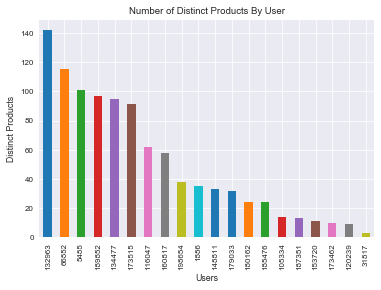

In [51]:
fig, ax = plt.subplots()
df2['num'].plot.bar();
ax.set_xticklabels(df2['user_id'])
plt.title("Number of Distinct Products By User")
plt.ylabel("Distinct Products")
plt.xlabel("Users")
plt.show()